<a href="https://colab.research.google.com/github/michelup/TEST_SDA/blob/main/Kopie_se%C5%A1itu_Kopie_se%C5%A1itu_FINAL_PROJECT_Pokemons_DenseNET121_freeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import json
import requests
import kagglehub
import os
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.src.applications.densenet import DenseNet121, preprocess_input
from keras.src.models import Sequential
from keras.src.utils import image_dataset_from_directory
from keras import layers, models
from keras.src.layers import Dense, Dropout

import matplotlib.pyplot as plt
import pandas as pd



from PIL import Image, ImageOps

from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image_dataset_from_directory
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model, Sequential



In [2]:
#data preprocessing
  #handling missing values
  #data scaling
  #categorical features encoding
  #preparation or extraction of the test collection - test/train
  #data augmentation

#model architecture
  #input layer
  #hidden layer
  #output layer
  #neurons
  #activation functions
  #connection between neurons
  #parametres

#Loss function
#optimizer
#iteratice learning process
#Hyper parameter tunning
#Final testing










In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
##import zipfile

# nahraď názvem svého souboru
#zip_path = 'first-gen-pokemon.zip'

#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
 #   zip_ref.extractall('pokemon_data')

# ověř, co je uvnitř
#print(os.listdir('pokemon_data'))
#print(os.listdir('pokemon_data/dataset'))
import kagglehub

path = kagglehub.dataset_download("rogerkoala/first-gen-pokemon")


100%|██████████| 133M/133M [00:00<00:00, 147MB/s]

Extracting files...


In [5]:
os.listdir()

['.config', 'sample_data']

In [6]:
data_dir = f"{path}{os.sep}dataset"


In [7]:
#train_dir = 'pokemon_data/dataset/train'
#test_dir = 'pokemon_data/dataset/test'

#priprava dat

#img_size = (224, 224)  #resampling na  224x224
#batch_size = 32   #velikost batche 32


# Load training and validation datasets
train_dataset = image_dataset_from_directory(
    data_dir + os.sep + "train",
    image_size=(224,224 ),  # Resize images
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    data_dir + os.sep + "test",
    image_size=(224,224),
    batch_size=32
)


Found 2249 files belonging to 151 classes.
Found 840 files belonging to 151 classes.


In [8]:
class_names = test_dataset.class_names #seznam tříd/názvů jednotlivých kategorií, odvozenych z názvů složek při načítání datasetu

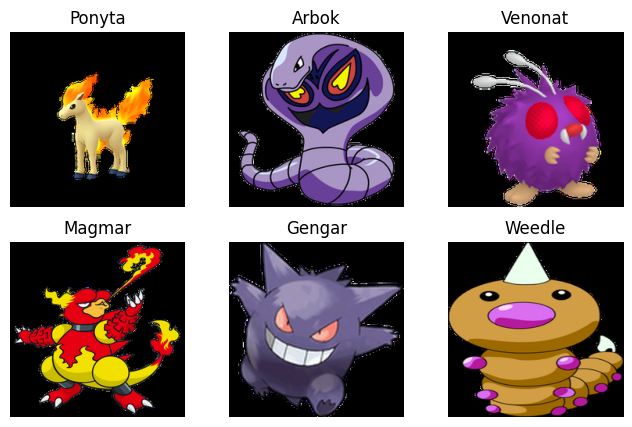

In [9]:
# Visualize a few images

plt.figure(figsize=(8, 5))
for images, labels in train_dataset.take(1):  # Take 1 batch
    for i in range(6):  # Show first 6 images
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i].numpy())]) #labels - vezme i-tý label z dávky(Tensoru), Numpy() převede tensor na NumPy pole
        plt.axis("off")
plt.show()

In [10]:
#predzpracovani obrazku v train a test datasetu pomoci preprocess input
train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), tf.one_hot(y, depth=151)))
test_dataset = test_dataset.map(lambda x, y: (preprocess_input(x), tf.one_hot(y, depth=151)))

In [11]:
# vytvoreni konvoluční neuronove síťe pro klasifikaci obrázků pomocí transfer learningu s předtrénovaným modelem DenseNet121
# model využívá silný předtrénovaný základ DenseNet121 pro extrakci vizuálních rysů a staví na něm vlastní klasifikátor pro nový úkol s 151 kategoriemi/pokemony
from tensorflow.keras import Sequential, layers
from tensorflow.keras.applications import DenseNet121


base_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

#FREEZE - zmrazeni vah
base_model.trainable = False

#MODEL
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(151, activation='softmax')
])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
model.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 151)            │        19,479 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,188,183 (27.42 MB)

 Trainable params: 150,679 (588.59 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [13]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [14]:
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/SDA/Final_project/soubor.keras',  #uklada checkpoints na muj drive, pokud bych ukladal do kolabu, tak v pripade padu bych o ne prisel
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)



In [15]:
epoch_val = 100

history=model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=epoch_val,
    callbacks=[checkpoint_callback]
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.0155 - loss: 5.2156
Epoch 1: val_accuracy improved from -inf to 0.05952, saving model to /content/drive/MyDrive/SDA/Final_project/soubor.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 88s 699ms/step - accuracy: 0.0156 - loss: 5.2132 - val_accuracy: 0.0595 - val_loss: 4.8265
Epoch 2/100
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.0620 - loss: 4.6966
Epoch 2: val_accuracy improved from 0.05952 to 0.18452, saving model to /content/drive/MyDrive/SDA/Final_project/soubor.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.0621 - loss: 4.6948 - val_accuracy: 0.1845 - val_loss: 4.2816
Epoch 3/100
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1372 - loss: 4.1357
Epoch 3: val_accuracy improved from 0.18452 to 0.35119, saving model to /content/drive/MyDrive/SDA/Final_project/soubor.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.1372 - loss: 4.1333 - val_accuracy: 0.3512 - val_loss: 3.4761
Epoch 4/100
70

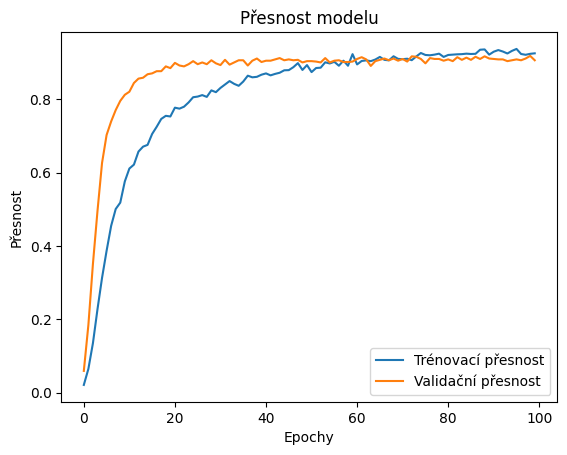

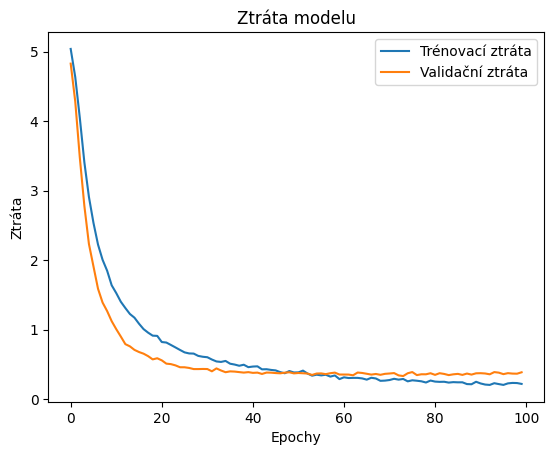

In [16]:

# Přesnost
plt.plot(history.history['accuracy'], label='Trénovací přesnost')
plt.plot(history.history['val_accuracy'], label='Validační přesnost')
plt.legend()
plt.title('Přesnost modelu')
plt.xlabel('Epochy')
plt.ylabel('Přesnost')
plt.show()

# Ztráta
plt.plot(history.history['loss'], label='Trénovací ztráta')
plt.plot(history.history['val_loss'], label='Validační ztráta')
plt.legend()
plt.title('Ztráta modelu')
plt.xlabel('Epochy')
plt.ylabel('Ztráta')
plt.show()

In [17]:
import numpy as np

y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))         # skutečné třídy
    y_pred.extend(np.argmax(preds, axis=1))                   # predikované třídy

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

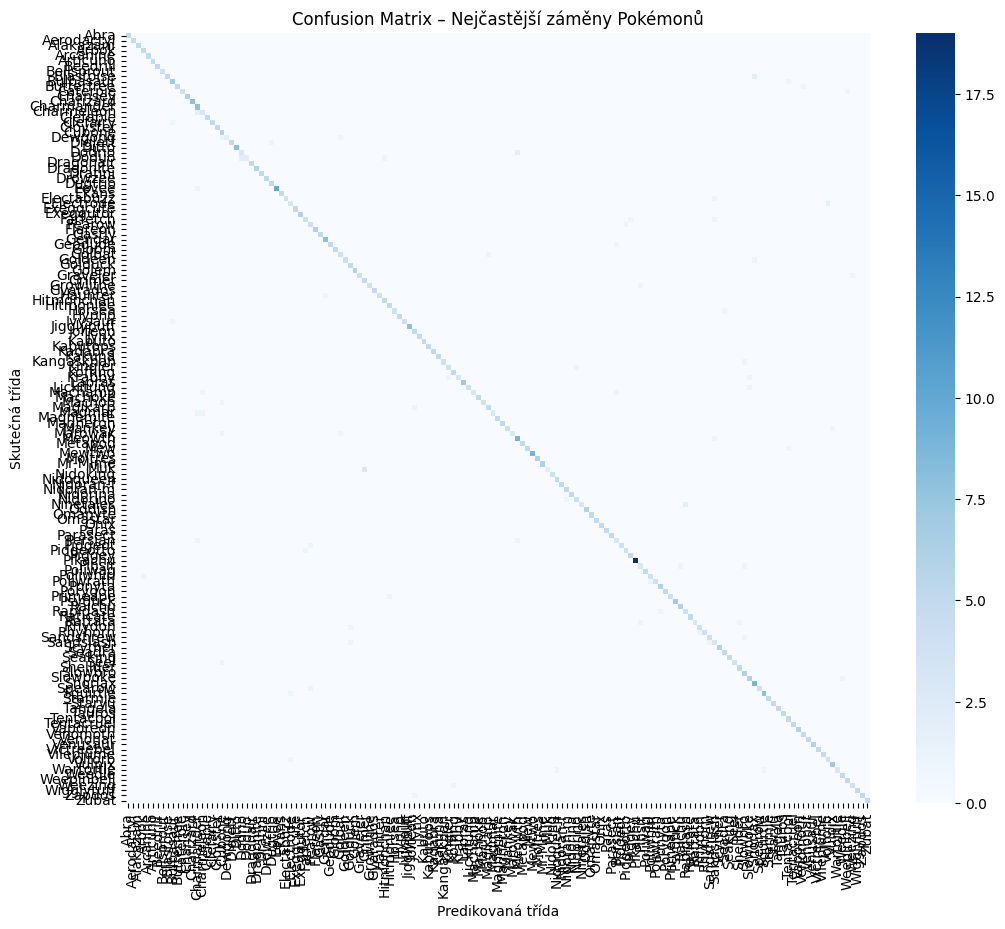

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predikovaná třída')
plt.ylabel('Skutečná třída')
plt.title('Confusion Matrix – Nejčastější záměny Pokémonů')
plt.show()


In [19]:
#TOP 10 nejcastejsich zamen - Confusion matrix
import pandas as pd

cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
most_confused = cm_df.stack().sort_values(ascending=False)
most_confused = most_confused[most_confused.index.get_level_values(0) != most_confused.index.get_level_values(1)]
print("Top 10 nejčastějších záměn:")
print(most_confused.head(10))

Top 10 nejčastějších záměn:
Muk         Grimer        3
Charmeleon  Charmander    2
Doduo       Dodrio        2
Electrode   Voltorb       2
Dodrio      Meowth        2
Blastoise   Snorlax       2
Ninetales   Rapidash      2
Persian     Charmander    1
Diglett     Dugtrio       1
Pinsir      Raichu        1
dtype: int64


In [20]:


import random
import matplotlib.pyplot as plt

def show_comparison(wrong_img, correct_img, true_label, pred_label):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    for ax, img, title in zip(axes, [wrong_img, correct_img], [f"Predikce: {pred_label}", f"Správně: {true_label}"]):
        if img.dtype != np.uint8:
            img = (img - np.min(img)) / (np.max(img) - np.min(img))
            img = (img * 255).astype("uint8")
        ax.imshow(img)
        ax.set_title(title, fontsize=10)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

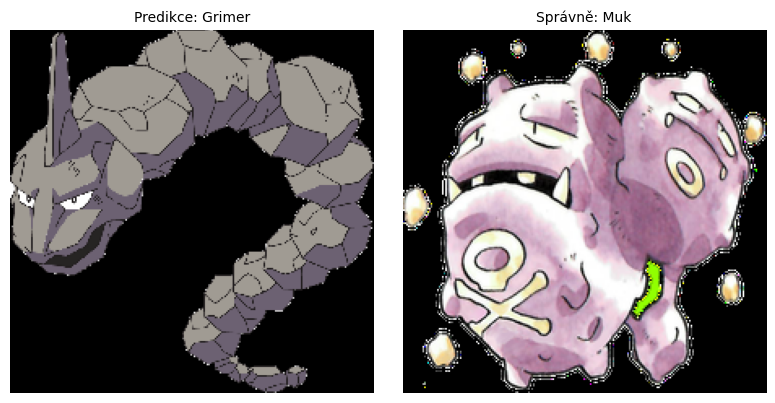

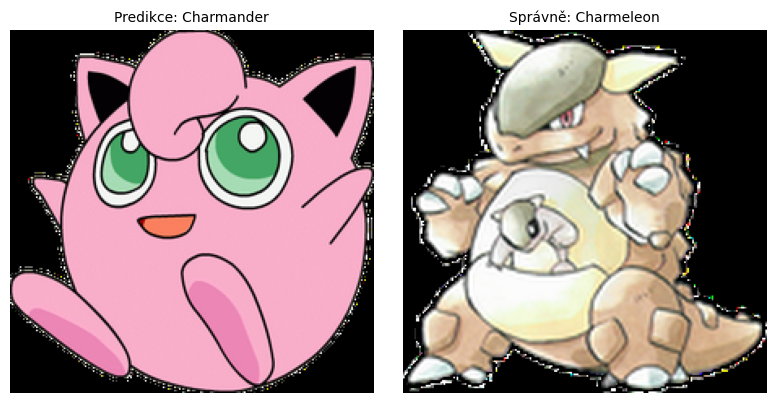

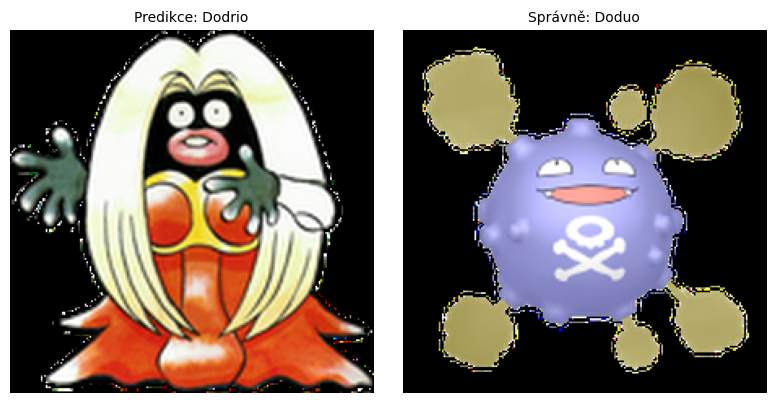

In [21]:
# Zobraz top3 záměn jako dvojice obrázk

shown = 0

# Collect images from the test dataset before preprocessing
images_list = []
for images, labels in test_dataset.unbatch():
    images_list.append(images.numpy())


for (true_cls, pred_cls), count in most_confused.items():
    true_idx = class_names.index(true_cls)
    pred_idx = class_names.index(pred_cls)

    # Najdi špatně klasifikovaný obrázek
    wrong_img = None
    for i in range(len(y_true)):
        if y_true[i] == true_idx and y_pred[i] == pred_idx:
            wrong_img = images_list[i]
            break

    # Najdi správně klasifikovaný obrázek z predikované třídy
    correct_img = None
    for i in range(len(y_true)):
        if y_true[i] == pred_idx and y_pred[i] == pred_idx:
            correct_img = images_list[i]
            break

    # Pokud máme obě varianty, zobrazíme je
    if wrong_img is not None and correct_img is not None:
        show_comparison(wrong_img, correct_img, true_cls, pred_cls)
        shown += 1

    if shown >= 3:
        break